In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_df = pd.read_csv('minethatdata_womens_train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21346 entries, 0 to 21345
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            21346 non-null  int64  
 1   recency          21346 non-null  int64  
 2   history_segment  21346 non-null  object 
 3   history          21346 non-null  float64
 4   mens             21346 non-null  int64  
 5   womens           21346 non-null  int64  
 6   zip_code         21346 non-null  object 
 7   newbie           21346 non-null  int64  
 8   channel          21346 non-null  object 
 9   segment          21346 non-null  object 
 10  visit            21346 non-null  int64  
 11  conversion       21346 non-null  int64  
 12  spend            21346 non-null  float64
dtypes: float64(2), int64(7), object(4)
memory usage: 2.1+ MB


In [4]:
test_df = pd.read_csv('minethatdata_womens_test_no_answers.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21347 entries, 0 to 21346
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            21347 non-null  int64  
 1   recency          21347 non-null  int64  
 2   history_segment  21347 non-null  object 
 3   history          21347 non-null  float64
 4   mens             21347 non-null  int64  
 5   womens           21347 non-null  int64  
 6   zip_code         21347 non-null  object 
 7   newbie           21347 non-null  int64  
 8   channel          21347 non-null  object 
 9   segment          21347 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 1.6+ MB


In [5]:
whole_df = pd.concat([train_df.assign(sample='train'),
                      test_df.assign(sample='test'),],
                     ignore_index=True)
whole_df.head()

,index,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,sample
0,54222,10,1) $0 - $100,29.99,0,1,Surburban,1,Phone,No E-Mail,0.0,0.0,0.0,train
1,30074,6,3) $200 - $350,292.39,0,1,Rural,0,Phone,Womens E-Mail,0.0,0.0,0.0,train
2,2725,8,1) $0 - $100,35.57,1,0,Surburban,0,Phone,No E-Mail,0.0,0.0,0.0,train
3,52884,1,1) $0 - $100,75.64,1,0,Surburban,1,Web,No E-Mail,0.0,0.0,0.0,train
4,42004,4,1) $0 - $100,29.99,1,0,Surburban,1,Web,Womens E-Mail,0.0,0.0,0.0,train


<AxesSubplot:xlabel='segment', ylabel='count'>

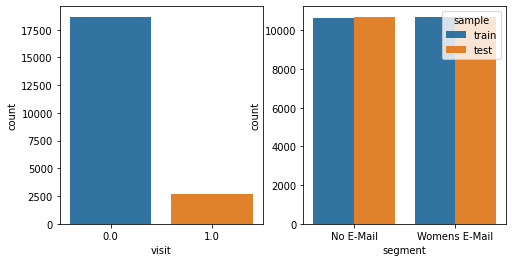

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
sns.countplot(x='visit',
              data=whole_df,
              ax=axs[0])
sns.countplot(x='segment',
              hue='sample',
              data=whole_df,
              ax=axs[1])

In [15]:
features_list = ['recency',
                 'history_segment',
                 'history',
                 'mens',
                 'womens',
                 'zip_code',
                 'newbie',
                 'channel',]

In [16]:
whole_df[features_list].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
recency,42693.0,NaN,NaN,NaN,5.758789,3.504745,1.0,2.0,5.0,9.0,12.0
history_segment,42693,7,1) $0 - $100,15246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
history,42693.0,NaN,NaN,NaN,241.711212,254.040262,29.99,65.16,158.46,326.05,3345.93
mens,42693.0,NaN,NaN,NaN,0.551074,0.49739,0.0,0.0,1.0,1.0,1.0
womens,42693.0,NaN,NaN,NaN,0.548872,0.497612,0.0,0.0,1.0,1.0,1.0
zip_code,42693,3,Surburban,19275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
newbie,42693.0,NaN,NaN,NaN,0.502612,0.499999,0.0,0.0,1.0,1.0,1.0
channel,42693,3,Phone,18781,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
category_features_list = ['history_segment',
                          'zip_code',
                          'channel',]
discrete_features_list = ['mens',
                          'womens',
                          'newbie',]
numeric_features_list = ['recency',
                         'history',]

<ipython-input-55-967bd843d8ac>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axs[i][j].set_xticklabels(values,


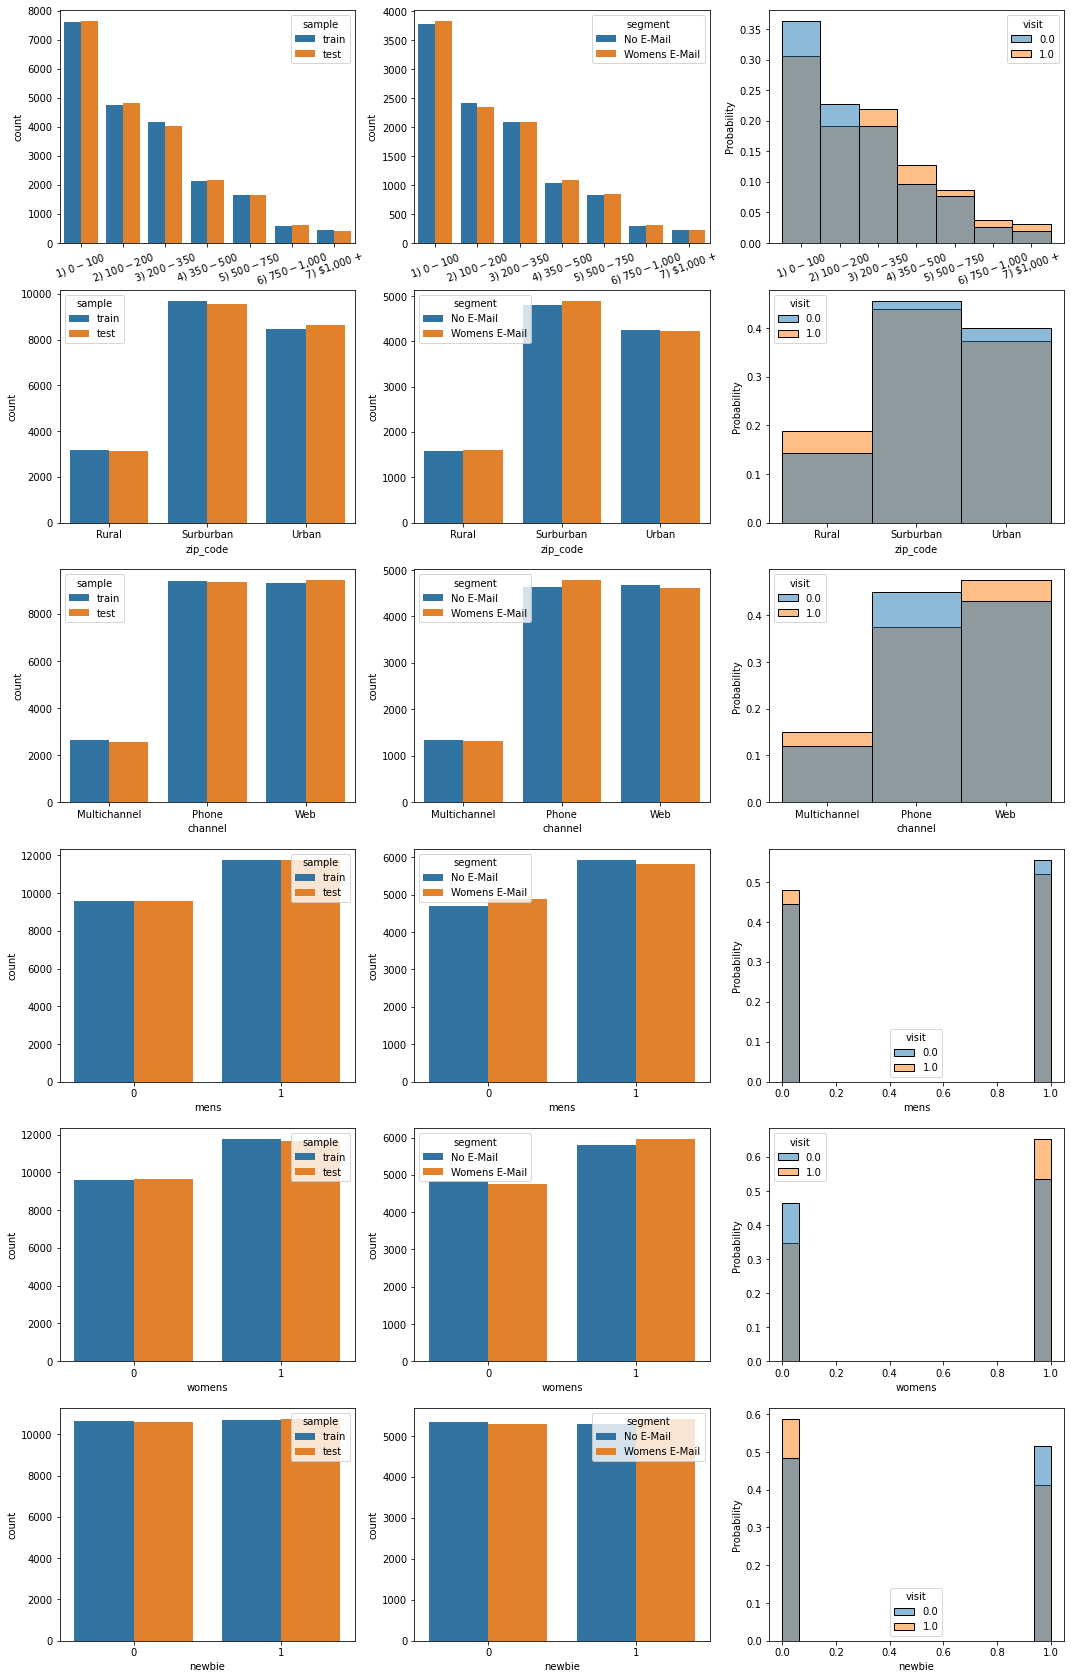

In [55]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(18, 30))
for i, feature in enumerate(category_features_list 
                            + discrete_features_list):
    values = list(sorted(whole_df[feature].unique()))
    if i == 0:
        for j in range(3):
            _ = axs[i][j].set_xticklabels(values,
                                          rotation=20)
    sns.countplot(x=feature,
                  hue='sample',
                  order=values,
                  data=whole_df,
                  ax=axs[i][0],)
    mask = whole_df['sample'] == 'train'
    sns.countplot(x=feature,
                  hue='segment',
                  order=values,
                  data=whole_df[mask],
                  ax=axs[i][1],)
    sns.histplot(x=feature,
                 hue='visit',
                 stat='probability',
                 common_norm=False,
                 data=whole_df[mask].sort_values(feature),
                 ax=axs[i][2],)

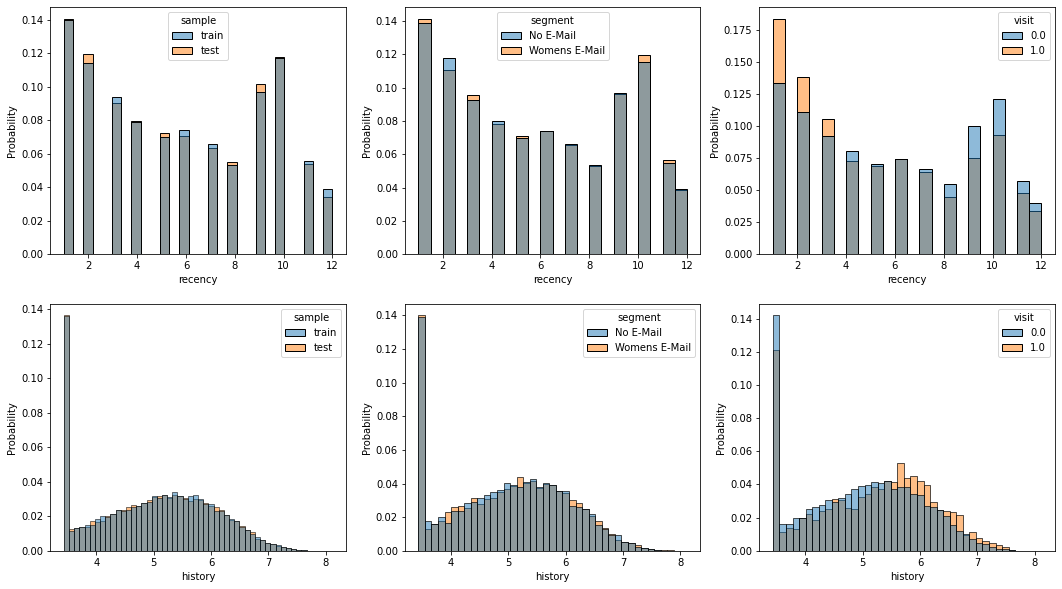

In [63]:
fig, axs = plt.subplots(nrows=len(numeric_features_list),
                        ncols=3,
                        figsize=(18, 10))
for i, feature in enumerate(numeric_features_list):
    feature_ss = whole_df[feature]
    if i == 1:
        feature_ss = whole_df[feature].map(np.log1p)
    
    sns.histplot(x=feature_ss,
                 hue='sample',
                 stat='probability',
                 common_norm=False,
                 data=whole_df,
                 ax=axs[i][0],)
    mask = whole_df['sample'] == 'train'
    sns.histplot(x=feature_ss,
                 hue='segment',
                 stat='probability',
                 common_norm=False,
                 data=whole_df[mask],
                 ax=axs[i][1],)
    sns.histplot(x=feature_ss[mask],
                 hue='visit',
                 stat='probability',
                 common_norm=False,
                 data=whole_df[mask],
                 ax=axs[i][2],)

In [68]:
whole_df[features_list].corr(method='kendall')

,recency,history,mens,womens,newbie
recency,1.000000,-0.165332,-0.522819,-0.522234,-0.532658
history,-0.165332,1.000000,-0.441936,-0.439749,-0.444994
mens,-0.522819,-0.441936,1.000000,-0.956718,-0.489443
womens,-0.522234,-0.439749,-0.956718,1.000000,-0.483825
newbie,-0.532658,-0.444994,-0.489443,-0.483825,1.000000
